In [27]:
import quail
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib
from scipy.spatial.distance import cdist

%matplotlib inline
sns.set_context('paper')
matplotlib.rcParams['pdf.fonttype'] = 42

## Load data

In [28]:
video_events = np.load('../data/video_events.npy')
recall_events = np.load('../data/recall_events.npy')

## Convert to egg format

In [29]:
pres = [[[{'item' : i, 'topics' : m} for i, m in enumerate(video_events)]] for sub in range(17)]

rec = []
for r in recall_events:
    items = list(np.argmax(1 - cdist(video_events, r), 0).astype(int))
    rec.append([[{'item' : item, 'topics' : t} for item, t in zip(items, r)]])

## Make the egg

In [30]:
egg = quail.Egg(pres=pres, rec=rec)
egg.info()

Number of subjects: 17
Number of lists per subject: 1
Number of words per list: 34
Date created: Fri Jun 22 19:35:38 2018
Meta data: {}


/mnt/sherlock_analyses/github/quail/quail/analysis/recmat.py:54: RuntimeWarning: Mean of empty slice
  distance) for feature in features], 0)
/opt/conda/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
/mnt/sherlock_analyses/github/quail/quail/analysis/lagcrp.py:129: RuntimeWarning: Mean of empty slice
  return np.nanmean(lagcrp, axis=0)


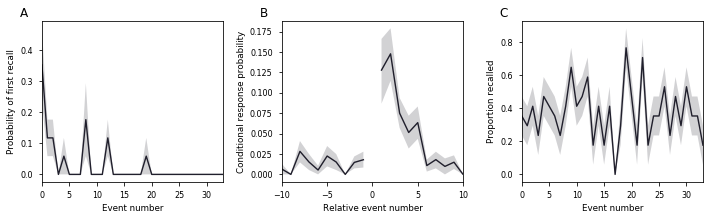

In [47]:
fig, axarr = plt.subplots(1, 3)
fig.set_size_inches(10, 3)
sns.set_palette('bone')

analysis = ['pfr', 'lagcrp', 'spc']
for ax, a in zip(axarr, analysis):
    egg.analyze(a, match='best', features=['topics'], 
                distance='correlation').plot(show=False, ax=ax, legend=False)
        
# make some adjustments
axarr[1].set_xlim(-10, 10)
axarr[0].set_ylabel('Probability of first recall')
axarr[1].set_ylabel('Conditional response probability')
axarr[2].set_ylabel('Proportion recalled')
axarr[0].set_xlabel('Event number')
axarr[1].set_xlabel('Relative event number')
axarr[2].set_xlabel('Event number')
plt.subplots_adjust(wspace=.45, hspace=.75)
plt.tight_layout()

# add labels
label=['A', 'B', 'C']
for p, l in zip(axarr, label):
    p.text(-.1,1.025,l,
        horizontalalignment='center',
        transform=p.transAxes,
          fontsize=12)

plt.savefig('../figures/list_learning.pdf')
plt.show()

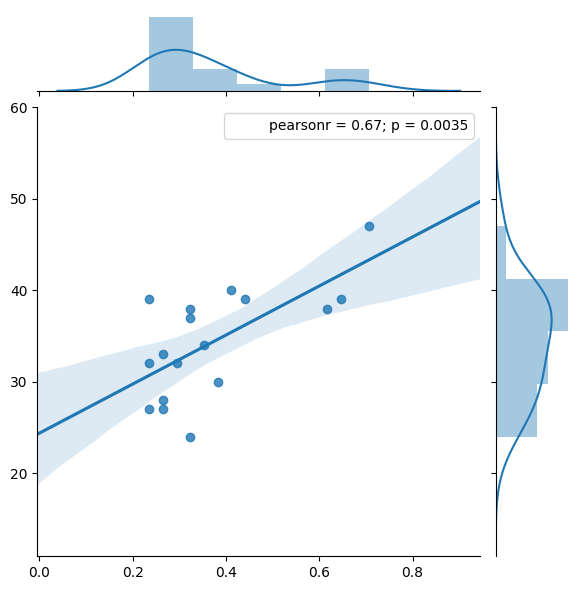

In [83]:
hand_rec = np.array([27, 24, 32, 33, 32, 39, 30, 39, 28, 40, 34, 38, 47, 38, 27, 37, 39])
sns.jointplot(spc.data.mean(1).values, hand_rec, kind='reg')
plt.show()

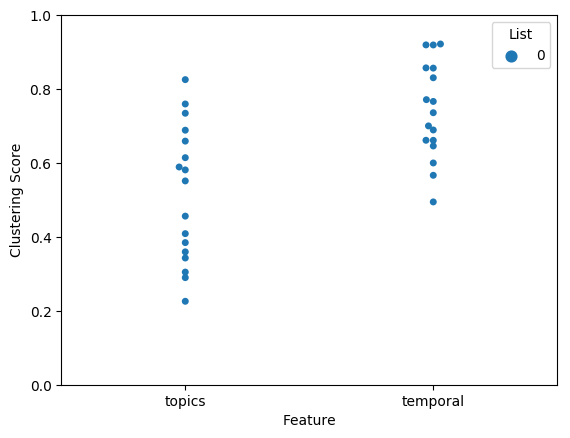

In [84]:
clustering = egg.analyze('fingerprint')
clustering.plot(plot_style='swarm', ylim=[0,1])


In [89]:
ks = np.array([8, 14, 11, 9, 14, 10, 17, 17, 10, 20, 19, 25, 27, 14, 10, 14, 23])
hand_rec = np.array([27, 24, 32, 33, 32, 39, 30, 39, 28, 40, 34, 38, 47, 38, 27, 37, 39])
auto_rec = acc.data[0].values
# auto_rec = spc.data.mean(1).values

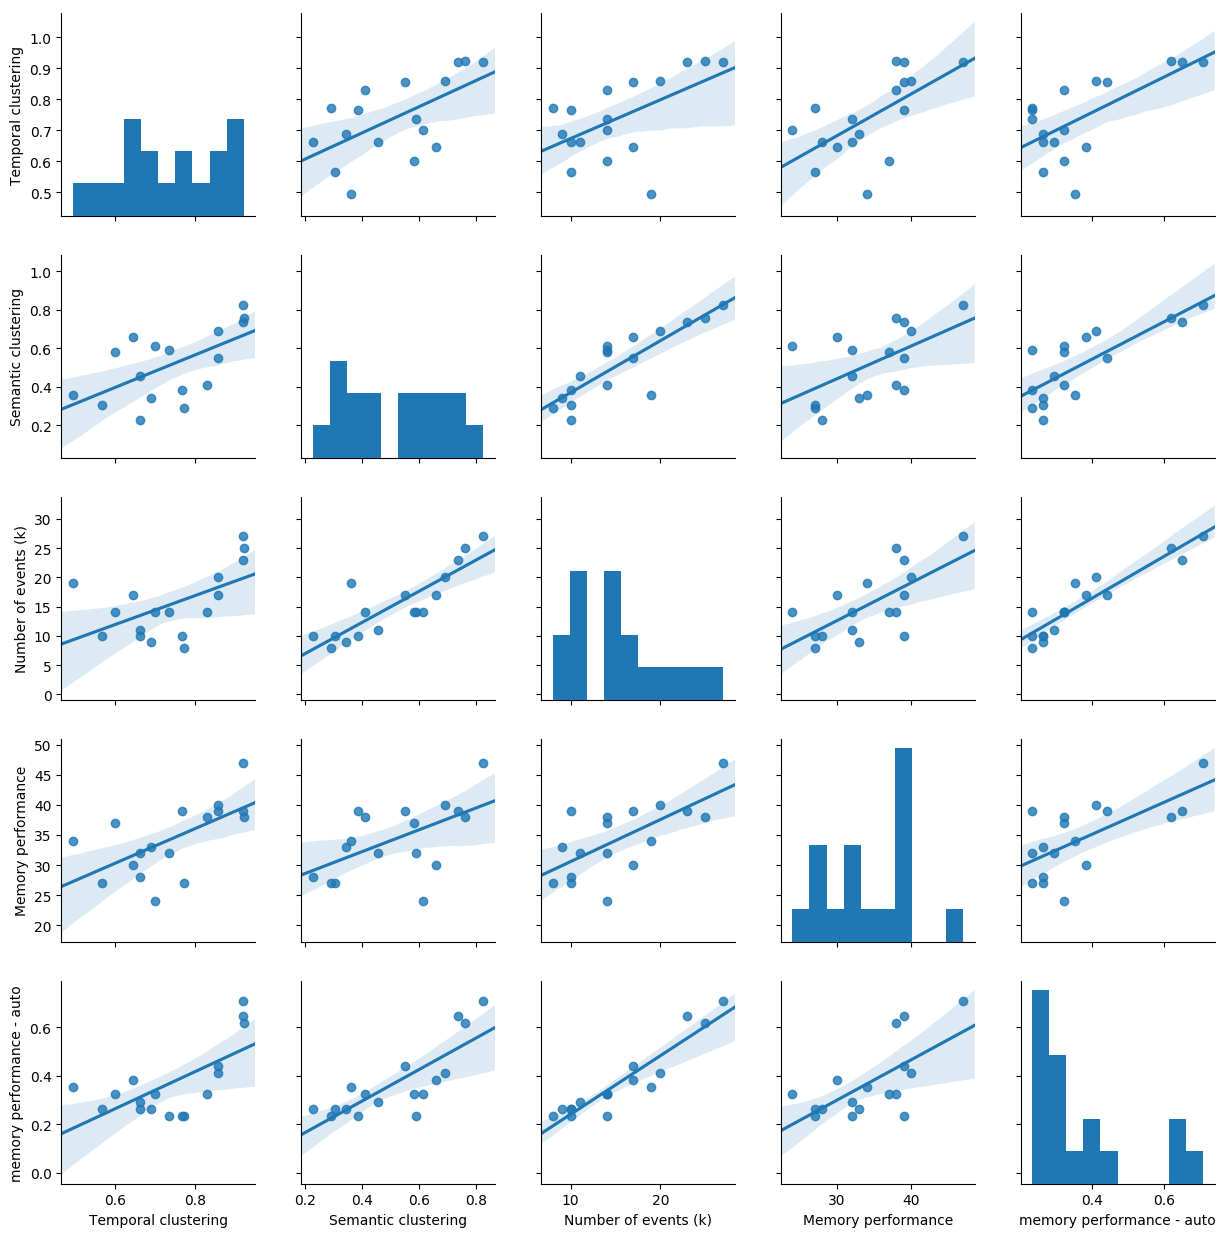

In [93]:
sns.reset_defaults()
df = pd.DataFrame(np.array([clustering.data.temporal.values, clustering.data.topics.values, ks, hand_rec, auto_rec]).T, columns=['Temporal clustering', 'Semantic clustering', 'Number of events (k)', 'Memory performance (proportion correct)', 'memory performance - auto'])
g = sns.PairGrid(df)
g = g.map_diag(plt.hist)
g = g.map_offdiag(sns.regplot)
plt.show()

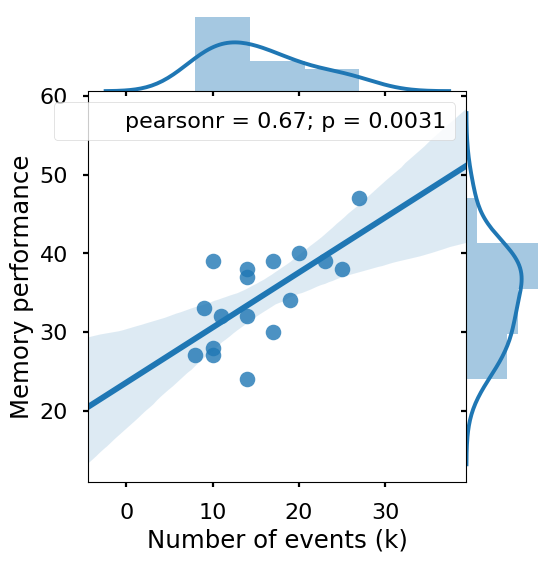

In [111]:
sns.set_context('poster')
sns.jointplot(y=df['Memory performance'], x=df['Number of events (k)'], kind='reg', space=False)
matplotlib.rcParams['pdf.fonttype'] = 42
plt.savefig('../figures/mem_k_corr.pdf')
plt.show()

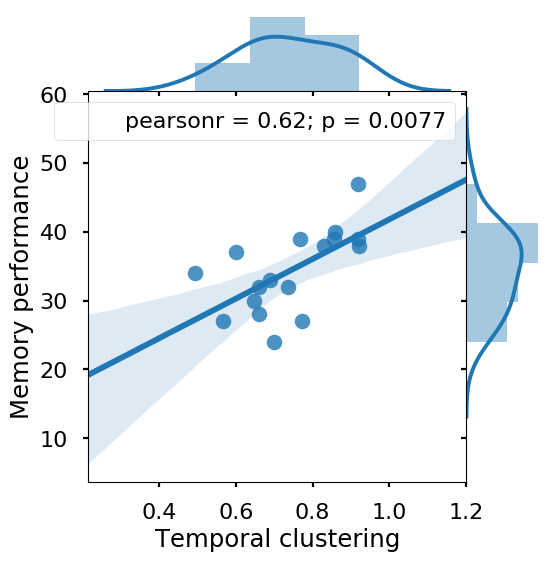

In [112]:
sns.jointplot(y=df['Memory performance'], x=df['Temporal clustering'], kind='reg', space=False)
matplotlib.rcParams['pdf.fonttype'] = 42
plt.savefig('../figures/mem_temporal_corr.pdf')
plt.show()

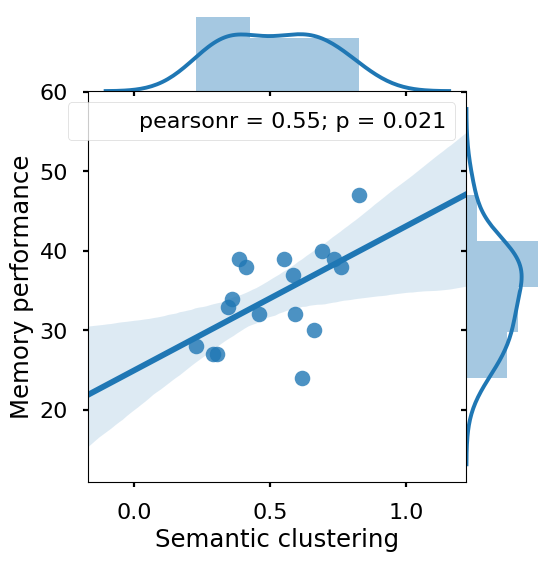

In [113]:
sns.jointplot(y=df['Memory performance'], x=df['Semantic clustering'], kind='reg', space=False)
matplotlib.rcParams['pdf.fonttype'] = 42
plt.savefig('../figures/mem_semantic_corr.pdf')
plt.show()

/Users/andyheusser/Documents/github/quail/quail/analysis/clustering.py:78: RuntimeWarning: Mean of empty slice
  return np.nanmean(ranks)


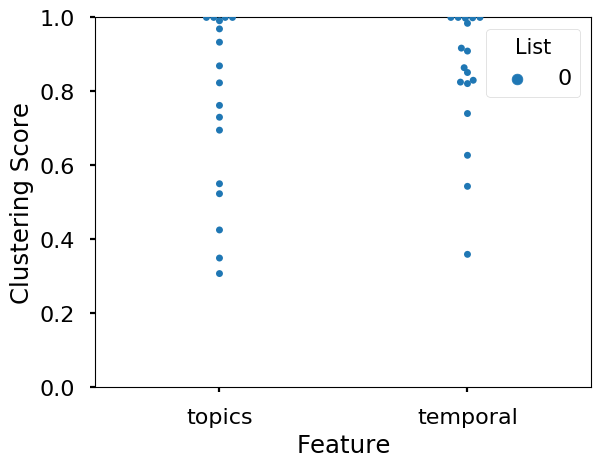

In [114]:
clustering2 = egg.analyze('fingerprint', permute=True)
clustering2.plot(plot_style='swarm', ylim=[0,1])


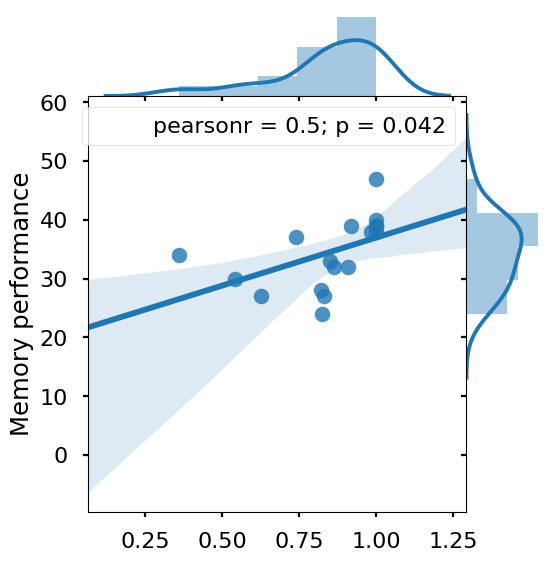

In [124]:
sns.jointplot(y=df['Memory performance'], x=clustering2.data['temporal'].values, kind='reg', space=False)
plt.show()

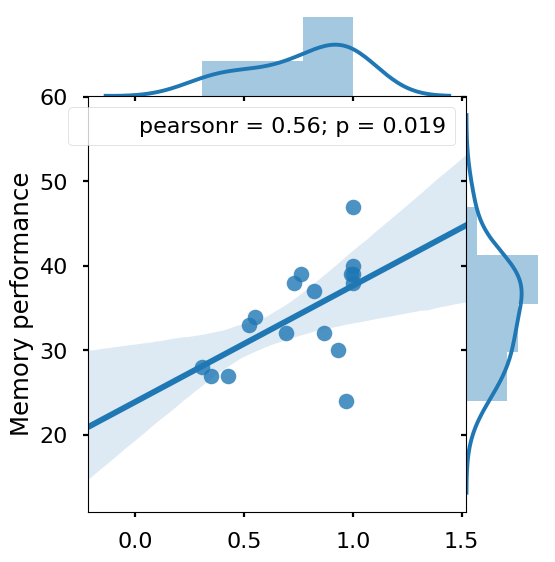

In [125]:
sns.jointplot(y=df['Memory performance'], x=clustering2.data['topics'].values, kind='reg', space=False)
plt.show()